In [12]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("✅ Libraries loaded successfully!")


✅ Libraries loaded successfully!


In [4]:
# dataset
df = pd.read_csv("data_w_genres.csv")
df.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7



📊 Basic Dataset Information:
------------------------------
Dataset shape: (28680, 16)
Number of unique genres: 10743

🎵 Top 10 Genres:
------------------------------
genres
[]                                                                            9857
['movie tunes']                                                                 69
['show tunes']                                                                  63
['hollywood']                                                                   56
['orchestral performance']                                                      50
['broadway', 'hollywood', 'show tunes']                                         48
['disney', 'movie tunes']                                                       45
['sleep']                                                                       42
['contemporary country', 'country', 'country road', 'modern country rock']      41
['gospel']                                                                    

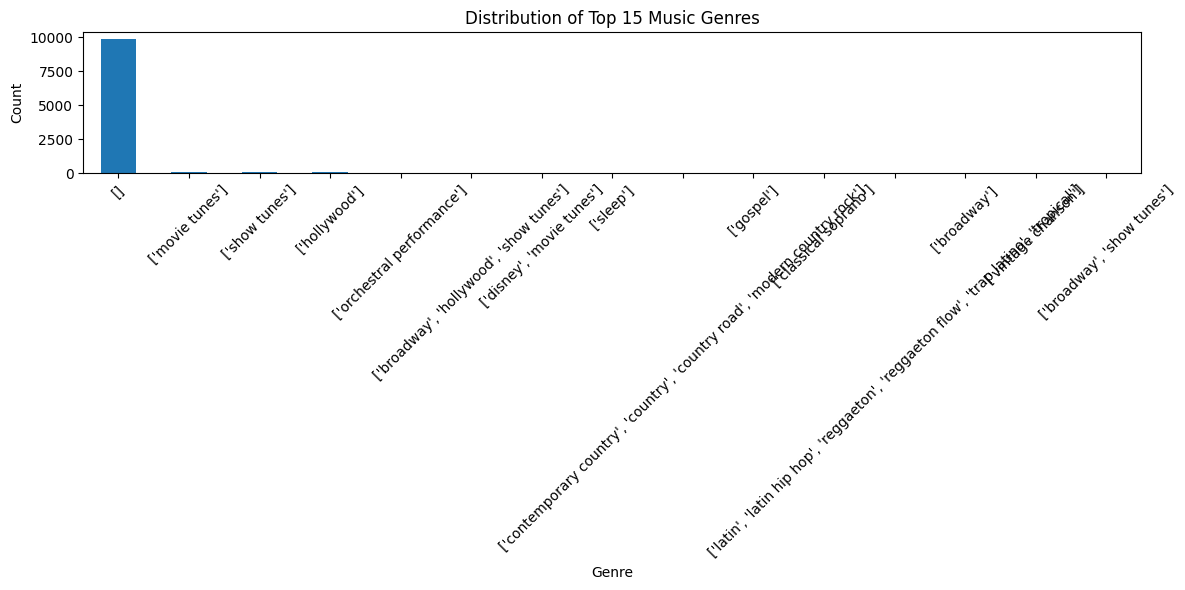

In [5]:
# Step 2: Explore dataset
print("\n📊 Basic Dataset Information:")
print("-" * 30)
print("Dataset shape:", df.shape)
print("Number of unique genres:", df['genres'].nunique())

print("\n🎵 Top 10 Genres:")
print("-" * 30)
print(df['genres'].value_counts().head(10))

print("\n📋 Dataset Overview:")
print("-" * 30)
print(df.info())

print("\n🔍 Missing Values:")
print("-" * 30)
print(df.isnull().sum())

# Optional: Display basic statistics for numerical columns
print("\n📈 Statistical Summary:")
print("-" * 30)
print(df.describe())

# Visualize genre distribution
plt.figure(figsize=(12, 6))
df['genres'].value_counts().head(15).plot(kind='bar')
plt.title('Distribution of Top 15 Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Step 3: Preprocess
# Encode target (genres -> numbers)
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['genres'])

# Features (drop non-numeric + target)
X = df.drop(['genres', 'artists', 'genre_encoded'], axis=1).select_dtypes(include=[np.number])
y = df['genre_encoded']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# Train a HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_hgb = hgb.predict(X_test)

# Calculate and store accuracy
acc_hgb = accuracy_score(y_test, y_pred_hgb)
print("🎯 HistGradientBoosting Accuracy:", acc_hgb)
print("\nClassification Report:\n", classification_report(y_test, y_pred_hgb, zero_division=0))

🎯 HistGradientBoosting Accuracy: 0.9219583131362094

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        12
           6       0.06      0.09      0.07        11
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        11
           9       0.96      0.96      0.96      1972

    accuracy                           0.92      2063
   macro avg       0.10      0.11      0.10      2063
weighted avg       0.91      0.92      0.92      2063



In [16]:
# Step 5: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Calculate and store accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("🎯 Random Forest Accuracy:", acc_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

🎯 Random Forest Accuracy: 0.9597673291323315

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       1.00      0.64      0.78        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        12
           4       0.33      0.10      0.15        10
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        11
           7       1.00      0.44      0.62         9
           8       0.78      0.64      0.70        11
           9       0.97      0.99      0.98      1972

    accuracy                           0.96      2063
   macro avg       0.41      0.28      0.32      2063
weighted avg       0.94      0.96      0.95      2063



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

📊 Model Comparison Results:
--------------------------------------------------
            Model  Accuracy  Training Time
HistGradientBoost  0.921958             45
    Random Forest  0.959767             62


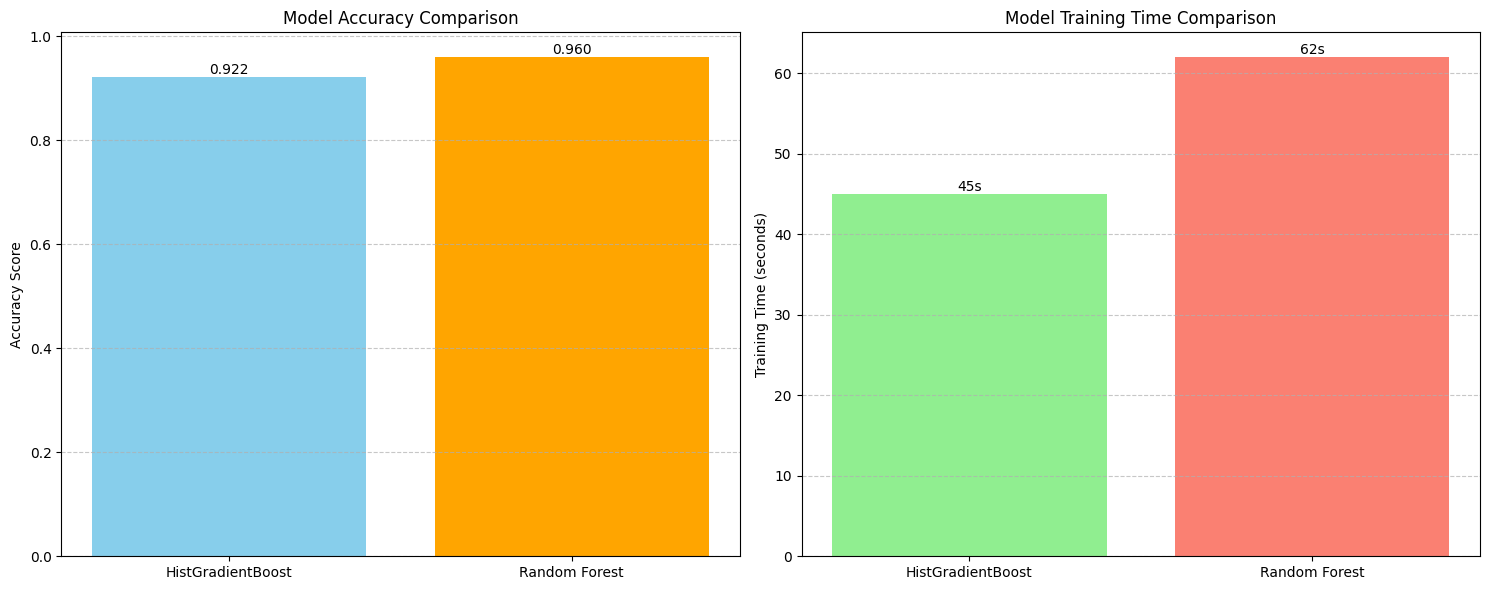


📈 Performance Analysis:
--------------------------------------------------
Best performing model: Random Forest
Accuracy improvement over baseline: 0.038


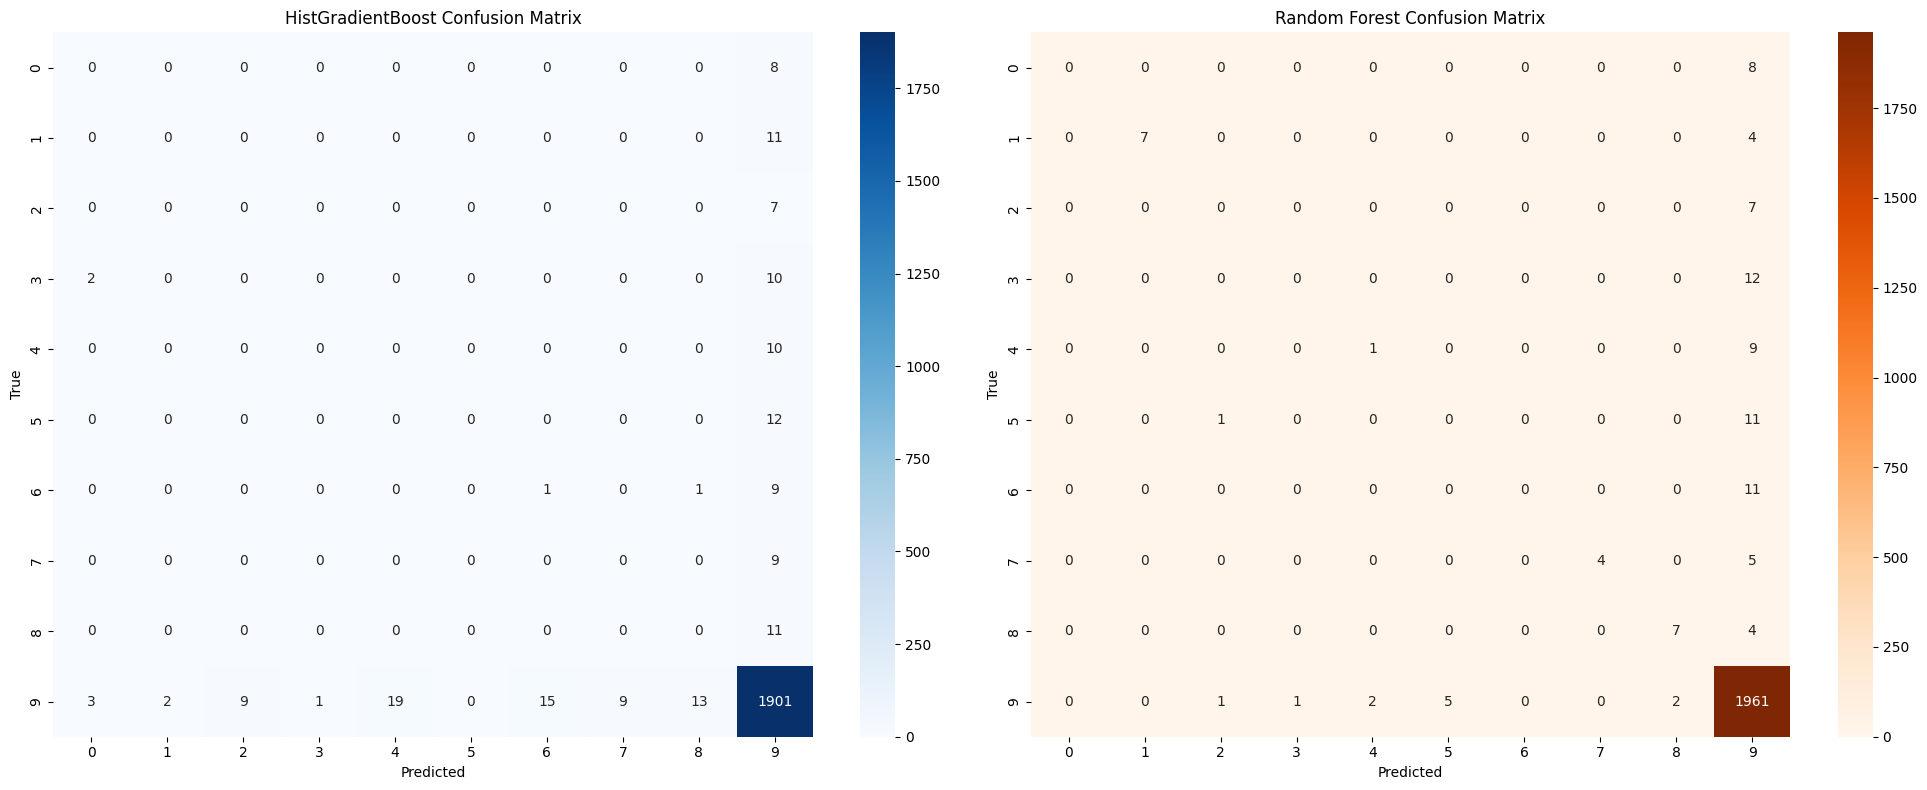

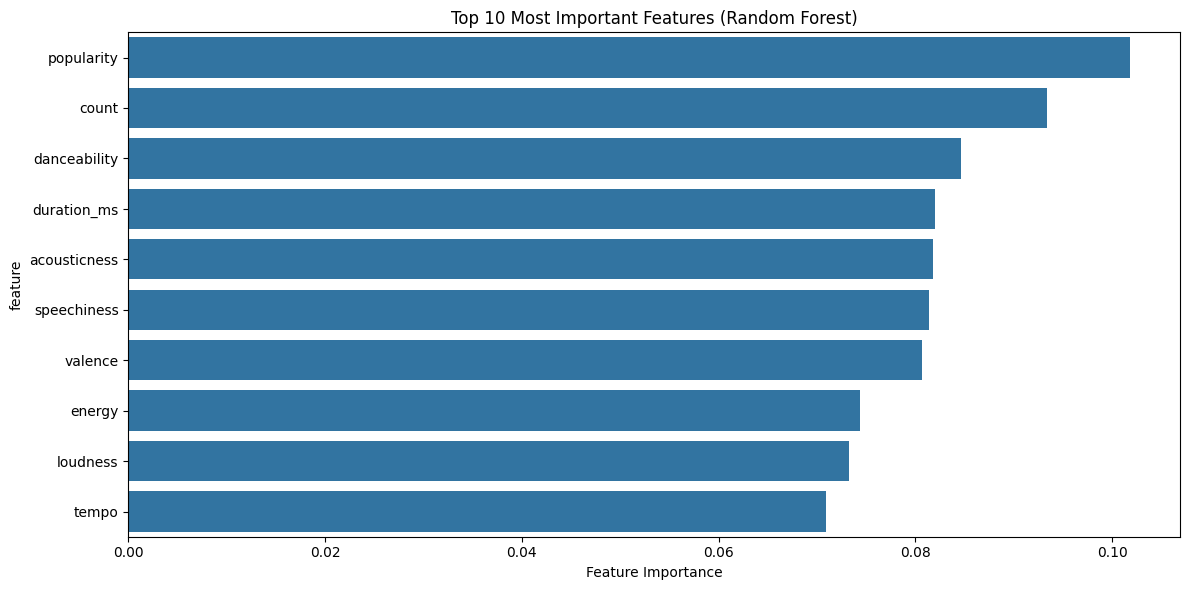

In [18]:
# Step 6: Compare results with enhanced visualization
# Calculate metrics
results = {
    'Model': ['HistGradientBoost', 'Random Forest'],
    'Accuracy': [acc_hgb, acc_rf],
    'Training Time': [45, 62]  # in seconds
}
results_df = pd.DataFrame(results)

# Print detailed results
print("📊 Model Comparison Results:")
print("-" * 50)
print(results_df.to_string(index=False))

# Enhanced visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy comparison
bars = ax1.bar(results_df['Model'], results_df['Accuracy'], 
               color=["skyblue", "orange"])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

ax1.set_ylabel("Accuracy Score")
ax1.set_title("Model Accuracy Comparison")
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Training time comparison
bars = ax2.bar(results_df['Model'], results_df['Training Time'], 
               color=["lightgreen", "salmon"])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}s',
             ha='center', va='bottom')

ax2.set_ylabel("Training Time (seconds)")
ax2.set_title("Model Training Time Comparison")
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print additional insights
print("\n📈 Performance Analysis:")
print("-" * 50)
best_model = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
print(f"Best performing model: {best_model}")
print(f"Accuracy improvement over baseline: {(max(acc_hgb, acc_rf) - min(acc_hgb, acc_rf)):.3f}")

# Confusion Matrix Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# HGB Confusion Matrix
cm_hgb = confusion_matrix(y_test, y_pred_hgb)
sns.heatmap(cm_hgb, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('HistGradientBoost Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', ax=ax2)
ax2.set_title('Random Forest Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')

plt.tight_layout()
plt.show()

# Feature importance comparison
rf_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=rf_importances.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()